In [4]:
from sklearn.linear_model import LinearRegression
import mglearn
from sklearn.model_selection import train_test_split

In [5]:
X,y = mglearn.datasets.make_wave(n_samples = 60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [6]:
lr = LinearRegression().fit(X_train,y_train)

In [8]:
print('lf.coef_:{}'.format(lr.coef_))
print('lr.intercept_:{}'.format(lr.intercept_))
#分别输出线性拟合后的斜率和截距
#此处的下划线是sci-kit为了将训练数据得出的值与用户设置的参数区分开

lf.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [10]:
print('Training set score: {:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test,y_test)))
#分别输出训练集和测试集的拟合精确度

Training set score: 0.67
Test set score: 0.66


可以看出拟合精度并不好，存在欠拟合问题，因为数据集本身不够复杂

In [12]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
lr = LinearRegression().fit(X_train,y_train)
#用波士顿购房数据集进行线性拟合

In [13]:
print('Training set score: {:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test,y_test)))

Training set score: 0.95
Test set score: 0.61


可以看出训练集拟合精确度很高，但测试集却很低，说明存在过拟合问题

In [14]:
from sklearn.linear_model import Ridge
#使用岭回归(使每个特征对输出的映像尽可能小，即斜率很小)

In [17]:
ridge = Ridge().fit(X_train,y_train)

In [18]:
print('Training set score: {:.2f}'.format(ridge.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


可以看出训练集拟合精确度变低，但在测试集上的精确度却变高

In [19]:
ridge10 = Ridge(alpha = 10).fit(X_train,y_train)
#设置参数alpha的值，增大会使得系数更加趋向于0，会点各地训练集的性能，但可能提高泛化性能

In [20]:
print('Training set score: {:.2f}'.format(ridge10.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


In [21]:
ridge01 = Ridge(alpha = 0.1).fit(X_train,y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test,y_test)))
#alpha减小让系数受到的限制更小，若alpha很小，则拟合效果会越来越接近LinearRegression

Training set score: 0.93
Test set score: 0.77


In [22]:
import matplotlib.pyplot as plt

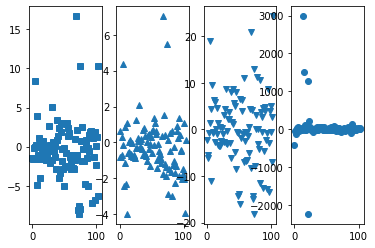

In [41]:
plt.subplot(1,4,1)
plt.plot(ridge.coef_,'s',label = 'Ridge alpha = 1')
plt.subplot(1,4,2)
plt.plot(ridge10.coef_,'^',label = 'Ridge alpha = 10')
plt.subplot(1,4,3)
plt.plot(ridge01.coef_,'v',label = 'Ridge alpha = 0.1')
plt.subplot(1,4,4)
plt.plot(lr.coef_,'o',label = 'LinearRegression')
plt.show()
#观察alpha取不同值时的coef_属性情况，横坐标为各个特征的系数，纵坐标为各个系数的值

In [35]:
from sklearn.linear_model import Lasso
import numpy as np

In [36]:
lasso = Lasso().fit(X_train,y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test,y_test)))
print('Number of feature used: {}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of feature used: 4


第三行输出的是特征对应系数不为零的个数，此处意为有4个特征的系数不为零，
即仅有4个特征用于拟合，所以拟合的精确度都不太好

In [38]:
lasso001 = Lasso(alpha = 0.01,max_iter = 100000).fit(X_train,y_train)
print('Training set score: {:.2f}'.format(lasso001.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test,y_test)))
print('Number of feature used: {}'.format(np.sum(lasso001.coef_ != 0)))
#与岭回归一样，通过减小alpha的值来解决欠拟合的问题，此时需要增加max_iter的值，即最大迭代次数

Training set score: 0.90
Test set score: 0.77
Number of feature used: 33


In [39]:
lasso00001 = Lasso(alpha = 0.0001,max_iter = 100000).fit(X_train,y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test,y_test)))
print('Number of feature used: {}'.format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of feature used: 96


若把alpha的值设置的太小，则会发生过拟合的问题

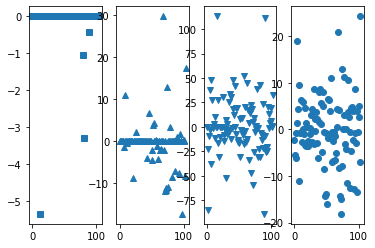

In [44]:
plt.subplot(1,4,1)
plt.plot(lasso.coef_,'s')
plt.subplot(1,4,2)
plt.plot(lasso001.coef_,'^')
plt.subplot(1,4,3)
plt.plot(lasso00001.coef_,'v')
plt.subplot(1,4,4)
plt.plot(ridge01.coef_,'o')
plt.show()